In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = './malgun.ttf'
font_name = font_manager.FontProperties (fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
df1=pd.read_csv('./부산 직업별 인력 현황 2016.csv',encoding='cp949')
df2=pd.read_csv('./시도_직업별_2008__이혼_2015-17.csv',encoding='cp949')
#df3=pd.read_csv('./시도_직업별_2008__이혼_2015-17.csv',encoding='cp949')

In [3]:
df2.head(30)

,시도별,직업별,2015,2015.1,2016,2016.1,2017,2017.1
0,시도별,직업별,남편,아내,남편,아내,남편,아내
1,전국,계,109153,109153,107328,107328,106032,106032
2,전국,관리자,8635,2463,9220,2772,9359,2907
3,전국,전문가 및 관련 종사자,13090,10430,12634,10846,12707,10916
4,전국,사무 종사자,12384,11044,11140,10771,10282,10386
5,전국,서비스 및 판매 종사자,22016,22960,20744,22665,19862,22038
6,전국,농림어업 숙련 종사자,3318,730,3249,746,3120,741
7,전국,기능원 및 관련 기능 종사자,8774,1853,8232,1704,7588,1779
8,전국,"장치,기계 조작 및 조립 종사자",6116,979,6212,1061,6348,993
9,전국,단순노무 종사자,11135,6253,10867,6114,11483,6299


In [4]:
df2=df2.rename(columns={'2015.1':'2015','2017.1':'2017'})
df2=df2.drop(['2015','2017'],axis=1)

In [5]:
a=df2[df2['시도별'].str.contains('부산광역시')]
a.set_index('시도별')
a=a.reset_index()
a=a.drop('index',axis=1)

In [6]:
df2

,시도별,직업별,2016,2016.1
0,시도별,직업별,남편,아내
1,전국,계,107328,107328
2,전국,관리자,9220,2772
3,전국,전문가 및 관련 종사자,12634,10846
4,전국,사무 종사자,11140,10771
...,...,...,...,...
205,국 외,기능원 및 관련 기능 종사자,107,60
206,국 외,"장치,기계 조작 및 조립 종사자",80,62
207,국 외,단순노무 종사자,234,339
208,국 외,"무직, 가사, 학생",380,2179


In [7]:
main=pd.DataFrame(a)

In [8]:
main=main.set_index('시도별')

In [9]:
main=main.rename(columns={'2016':'남편','2016.1':'아내'})

In [10]:
total=main.iloc[0]
main_d=main.iloc[1:]
main_d['아내'].astype(int)
man=main_d['남편'].astype(int)
man

#main_d.dtypes

시도별
부산광역시     606
부산광역시     783
부산광역시     683
부산광역시    1198
부산광역시      79
부산광역시     515
부산광역시     365
부산광역시    1105
부산광역시    1192
부산광역시     333
Name: 남편, dtype: int32

In [11]:
# data = {'A': 20, 'B': 35, 'C': 25, 'D': 20}
# labels = list(data.keys())
# values = list(data.values())

# # 원형 차트 그리기
# fig1, ax1 = plt.subplots()
# ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
# ax1.axis('equal')

# # 그래프 출력
# plt.show()
# group_names = ['Group A', 'Group B']
# group_values = [40, 60]

# # 그룹 내부에서 각 항목의 이름과 값이 딕셔너리 형태로 주어짐
# subgroup_names = ['A1', 'A2', 'B1', 'B2', 'B3']
# subgroup_values = [10, 30, 20, 15, 25]

# # 색상 설정
# colors = ['lightcoral', 'lightskyblue']

# # 첫 번째 그룹에 대한 원형 차트 그리기
# fig2, ax2 = plt.subplots()
# ax2.pie(group_values, labels=group_names, colors=colors, startangle=90, autopct='%1.1f%%', radius=1)
# ax2.axis('equal')

# # 두 번째 그룹에 대한 원형 차트 그리기
# ax2.pie(subgroup_values, labels=subgroup_names, labeldistance=0.7, colors=colors, radius=0.7, autopct='%1.1f%%', startangle=90)

# # 그래프 출력
# plt.show()


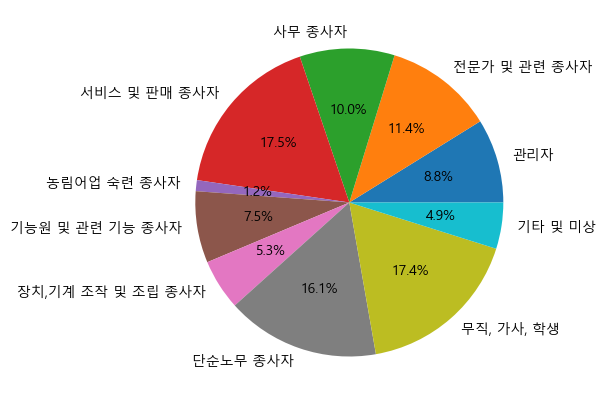

In [12]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,2)


plt.rc('font', family='Malgun Gothic')
plt.pie
plt.pie(main_d['남편'], labels=main_d['직업별'],autopct='%0.1f%%')



plt.show()

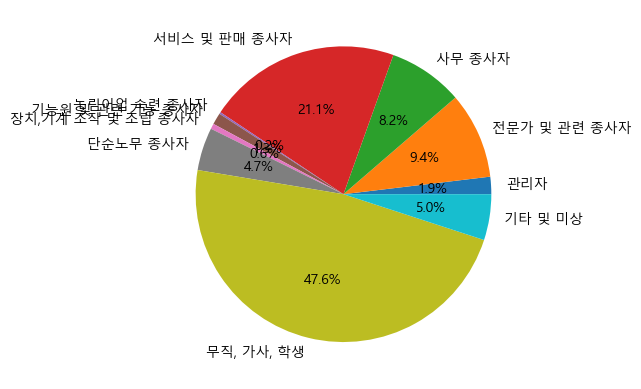

In [13]:
plt.rc('font', family='Malgun Gothic')
plt.pie
plt.pie(main_d['아내'], labels=main_d['직업별'],autopct='%0.1f%%')
plt.show()

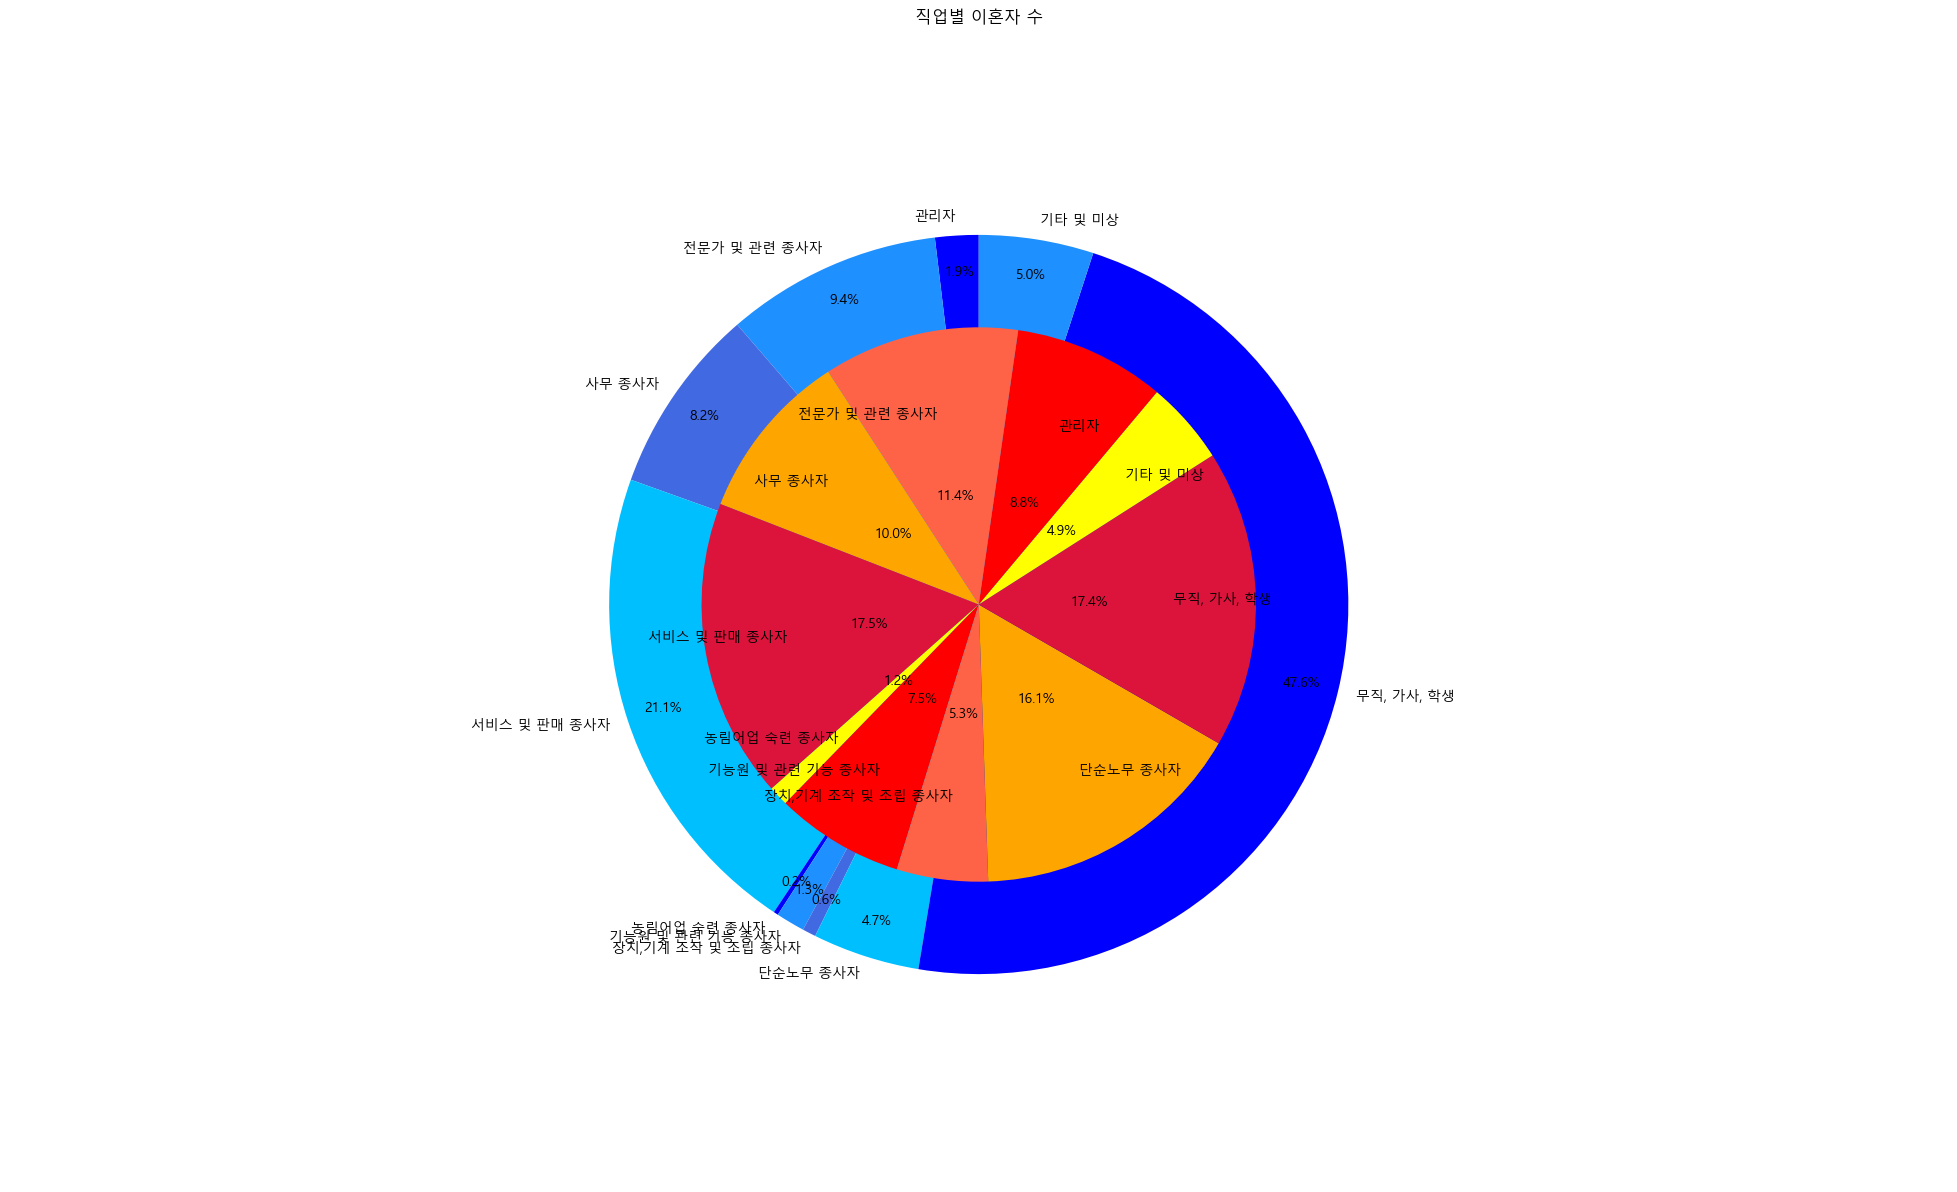

In [14]:
names = main_d['직업별']
group_values = main_d['아내']
subgroup_values = main_d['남편']

fig2, ax2 = plt.subplots(figsize=(25, 15))
ax2.pie(group_values, labels=names, startangle=90,colors = ['blue', 'dodgerblue', 'royalblue', 'deepskyblue'],
        autopct='%1.1f%%',labeldistance=1.05, radius=.8,textprops={'fontsize': 10}, pctdistance=.9)
ax2.axis('equal')
ax2.pie(subgroup_values, labels=names, labeldistance=0.7, radius=.6,colors = ['red', 'tomato', 'orange', 'crimson','yellow'],
        autopct='%1.1f%%', startangle=50,textprops={'fontsize': 10}, pctdistance=0.4)

#plt.text(1.4, 0.7, '원형 차트와 글', fontsize=15, ha='center', va='center')
ax2.set_title('직업별 이혼자 수', pad=1)

plt.show()

In [15]:
a=a.rename(columns={'2016':'남편','2016.1':'아내'})
#이혼 인원
a

,시도별,직업별,남편,아내
0,부산광역시,계,6859,6962
1,부산광역시,관리자,606,132
2,부산광역시,전문가 및 관련 종사자,783,657
3,부산광역시,사무 종사자,683,570
4,부산광역시,서비스 및 판매 종사자,1198,1471
5,부산광역시,농림어업 숙련 종사자,79,14
6,부산광역시,기능원 및 관련 기능 종사자,515,88
7,부산광역시,"장치,기계 조작 및 조립 종사자",365,41
8,부산광역시,단순노무 종사자,1105,326
9,부산광역시,"무직, 가사, 학생",1192,3314


In [16]:
df1 # 총 종사자 수

,직업별,2016,2016.1,2016.2,2016.3,2016.4,2016.5
0,직업별,종사자수 (명),종사자수 비율 (%),퇴사자수 (명),퇴사자수 비율 (%),신규채용 인원 (명),신규채용 인원 비율 (%)
1,합 계,664161,100.0,138874,100.0,139459,100.0
2,관리자,43200,6.5,1788,1.3,1324,0.9
3,전문가 및 관련 종사자,100608,15.1,17833,12.8,19179,13.8
4,사무 종사자,94112,14.2,9731,7.0,10698,7.7
5,서비스 종사자,82512,12.4,22881,16.5,21648,15.5
6,판매 종사자,60149,9.1,11427,8.2,11480,8.2
7,농림어업 숙련 종사자,1122,0.2,110,0.1,110,0.1
8,기능원 및 관련 기능 종사자,67547,10.2,13299,9.6,12396,8.9
9,장치·기계조작 및 조립종사자,90642,13.6,17964,12.9,16112,11.6


In [17]:
x=[{'직업별':'서비스 및 판매 종사자'},{'2016':82512+60149}]

In [18]:
do=df1.iloc[1:, 0:2]
do 

,직업별,2016
1,합 계,664161
2,관리자,43200
3,전문가 및 관련 종사자,100608
4,사무 종사자,94112
5,서비스 종사자,82512
6,판매 종사자,60149
7,농림어업 숙련 종사자,1122
8,기능원 및 관련 기능 종사자,67547
9,장치·기계조작 및 조립종사자,90642
10,단순노무종사자,124268


In [19]:
do.set_index('직업별', inplace=True)

In [20]:
do.loc['서비스 및 판매 종사자'] = 82512+60149

In [21]:
do

,2016
직업별,
합 계,664161
관리자,43200
전문가 및 관련 종사자,100608
사무 종사자,94112
서비스 종사자,82512
판매 종사자,60149
농림어업 숙련 종사자,1122
기능원 및 관련 기능 종사자,67547
장치·기계조작 및 조립종사자,90642


In [22]:
do=do.rename(index={'장치·기계조작 및 조립종사자':'장치,기계 조작 및 조립 종사자','합 계':'계','단순노무종사자':'단순노무 종사자'})

In [23]:
a=a.drop('시도별',axis=1)
a=a.set_index('직업별')

In [24]:
chart=pd.merge(a,do,how='left',left_on='직업별',right_on='직업별')
chart=chart.iloc[1:]
chart=chart.drop(index=['사무 종사자','기능원 및 관련 기능 종사자','장치,기계 조작 및 조립 종사자','무직, 가사, 학생','기타 및 미상','단순노무 종사자'])
chart

,남편,아내,2016
직업별,,,
관리자,606,132,43200
전문가 및 관련 종사자,783,657,100608
서비스 및 판매 종사자,1198,1471,142661
농림어업 숙련 종사자,79,14,1122


In [25]:
list_a=[]
list_b=[]
list_c=[]
list_d=[]
for i in range(0,4):
    nam=0
    nam=int(chart.iloc[i,2])-(int(chart.iloc[i,0])+int(chart.iloc[i,1]))
    if i==0:
        list_a.append(nam)
        list_a.append(chart.iloc[i,0])
        list_a.append(chart.iloc[i,1])
        continue
    elif i==1:
        list_b.append(nam)
        list_b.append(chart.iloc[i,0])
        list_b.append(chart.iloc[i,1])
        continue
    elif i==2:
        list_c.append(nam)
        list_c.append(chart.iloc[i,0])
        list_c.append(chart.iloc[i,1])
        continue
    else:
        list_d.append(nam)
        list_d.append(chart.iloc[i,0])
        list_d.append(chart.iloc[i,1])
        continue
print(list_a,list_b,list_c,list_d)

[42462, '606', '132'] [99168, '783', '657'] [139992, '1198', '1471'] [1029, '79', '14']


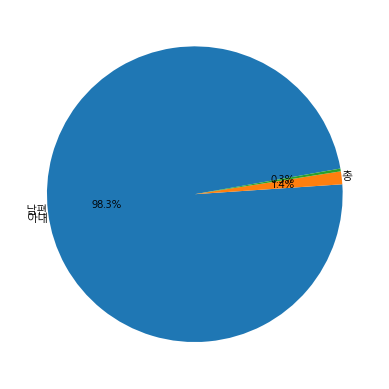

In [30]:
plt.rc('font', family='Malgun Gothic')
plt.pie(list_a,labels=['총','남편','아내'],autopct='%0.1f%%',startangle=10, radius=1,labeldistance=-1,textprops={'fontsize': 8})
plt.show()

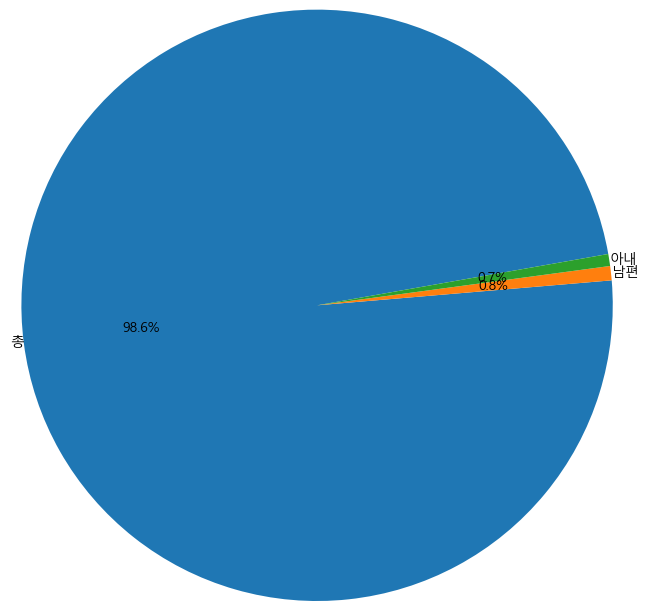

In [31]:
plt.rc('font', family='Malgun Gothic')
plt.pie(list_b,labels=['총','남편','아내'],autopct='%0.1f%%',startangle=10, radius=2,labeldistance=1,textprops={'fontsize': 10})
plt.show()

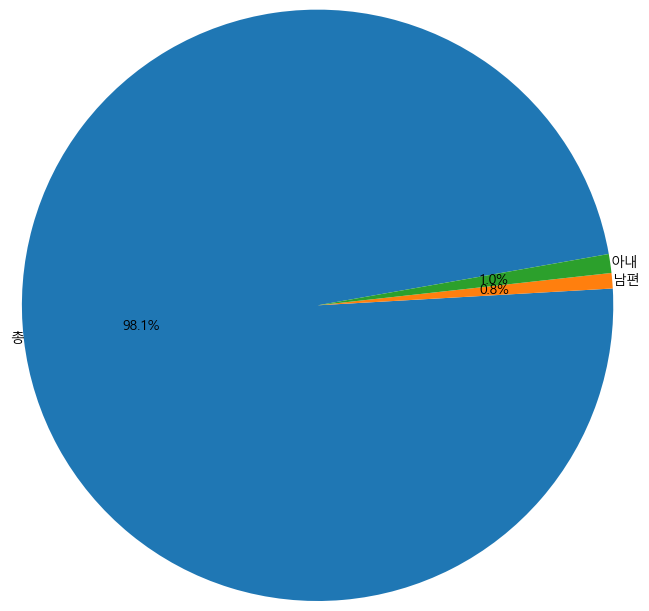

In [28]:
plt.rc('font', family='Malgun Gothic')
plt.pie(list_c,labels=['총','남편','아내'],autopct='%0.1f%%',startangle=10, radius=2,labeldistance=1,textprops={'fontsize': 10})
plt.show()

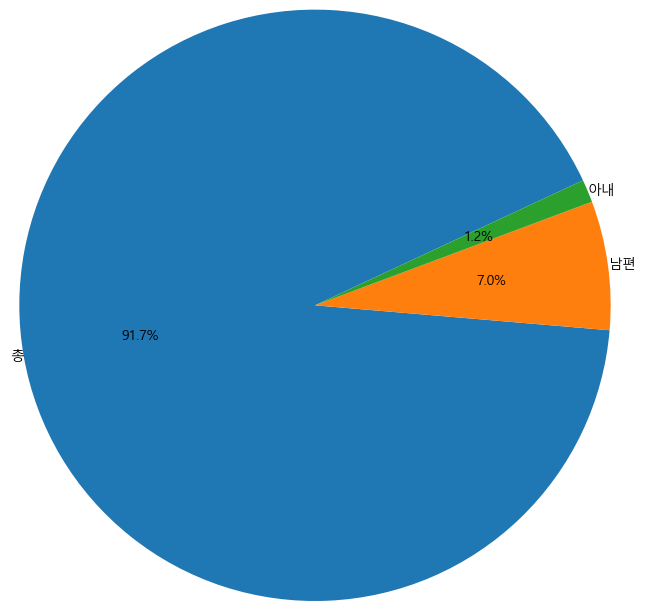

In [29]:
plt.rc('font', family='Malgun Gothic')
plt.pie(list_d,labels=['총','남편','아내'],autopct='%0.1f%%',startangle=25, radius=2,labeldistance=1,textprops={'fontsize': 10})
plt.show()